## Spam message classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SMS = pd.read_csv(r'D:\Caroline\Documents\Graduate\ISE 540 Text Analysis\Dataset\NLP Projects\NLP Projects\spam.tsv', sep='\t')
SMS.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


In [2]:
SMS.tail(10)

,label,message,length,punct
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,96,9
5563,ham,Ard 6 like dat lor.,19,1
5564,ham,Why don't you wait 'til at least wednesday to ...,67,3
5565,ham,Huh y lei...,12,3
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [3]:
# Check for missing values
print(SMS.isnull().sum())
print(len(SMS))


label      0
message    0
length     0
punct      0
dtype: int64
5572


In [4]:
# Take a quick look at the *ham* and *spam* `label` column
print(SMS['label'].unique())
print(SMS['label'].value_counts())

['ham' 'spam']
ham     4825
spam     747
Name: label, dtype: int64


In [5]:
# Use describe function to see the statistics about your data
SMS['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<font color=blue>From the value count, we know that ham data is much more than spam data, so the dataset is imbalanced and extremely skewed. Also, The mean value is 80.5 and yet the max length is 910.logarithmic x-axis.</font>

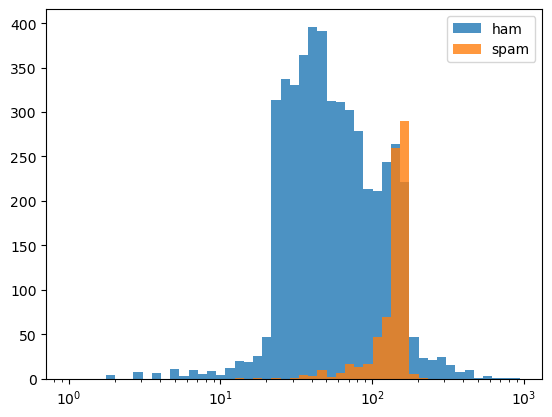

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log') # logarithmic x-axis
bins = 1.15**(np.arange(0,50))
plt.hist(SMS[SMS['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(SMS[SMS['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [7]:

# New_SMS=SMS.drop(SMS[[455:655]])
# print(New_SMS['length'].describe())
# Find the row index with the minimum value in the column
min_row_index = SMS['length'].idxmin()
# Remove the row with the minimum value
SMS_2 = SMS.drop(min_row_index)
New_SMS=SMS_2[len(SMS[SMS['label']=='spam']['length']):len(SMS)] 
print(New_SMS['length'].describe())
print(len(New_SMS))

count    4824.000000
mean       80.338723
std        60.643557
min         2.000000
25%        36.000000
50%        61.000000
75%       121.250000
max       910.000000
Name: length, dtype: float64
4824


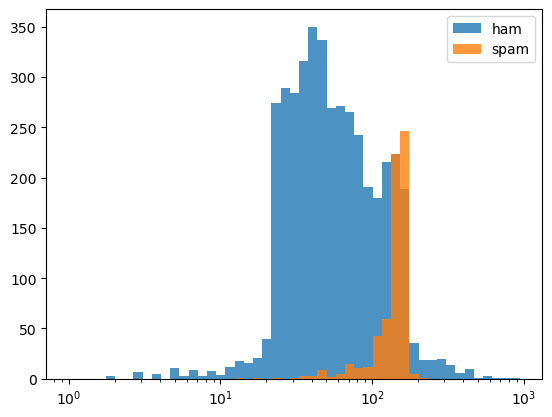

In [8]:
plt.xscale('log') # logarithmic x-axis
bins = 1.15**(np.arange(0,50))
plt.hist(New_SMS[New_SMS['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(New_SMS[New_SMS['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

#### Split the data into train & test sets

In [9]:
# Create Feature and Label sets
X = New_SMS['message'] 
y = New_SMS['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)
print(len(X_train))
print(len(y_train))

Training Data Shape: (3376,)
Testing Data Shape:  (1448,)
3376
3376


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

lsvc_classifier = Pipeline([('tfidf', TfidfVectorizer( )),
                     ('classifier_lsvc', LinearSVC( ))])

rf_classifier = Pipeline([('tfidf', TfidfVectorizer( )),                            
                     ('classifier_rf',RandomForestClassifier( ))])

# Feed the training data through the pipeline
print(lsvc_classifier.fit(X_train, y_train))
print(rf_classifier.fit(X_train, y_train))


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier_lsvc', LinearSVC())])
Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier_rf', RandomForestClassifier())])


In [11]:
# Form a prediction set
predict_lsvc = lsvc_classifier.predict(X_test)
predict_rf = rf_classifier.predict(X_test)

In [12]:
# Report the confusion matrix
from sklearn import metrics
print("lsvc model:",metrics.confusion_matrix(y_test,predict_lsvc))
print("Random Forest model:",metrics.confusion_matrix(y_test,predict_rf))

lsvc model: [[1246    1]
 [  17  184]]
Random Forest model: [[1247    0]
 [  41  160]]


In [13]:
# Print a classification report
print(metrics.classification_report(y_test,predict_lsvc))
print(metrics.classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1247
        spam       0.99      0.92      0.95       201

    accuracy                           0.99      1448
   macro avg       0.99      0.96      0.97      1448
weighted avg       0.99      0.99      0.99      1448

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1247
        spam       1.00      0.80      0.89       201

    accuracy                           0.97      1448
   macro avg       0.98      0.90      0.94      1448
weighted avg       0.97      0.97      0.97      1448



In [14]:
# Print the overall accuracy
print("Accuracy of lsvc model",metrics.accuracy_score(y_test,predict_lsvc))
print("Accuracy of Random Forest model:",metrics.accuracy_score(y_test,predict_rf))

Accuracy of lsvc model 0.9875690607734806
Accuracy of Random Forest model: 0.9716850828729282


Though the difference is small, the overall accuracy rate of lsvc is greater than the Random Forest model.

In [32]:
print(predict_lsvc)
print(pd.DataFrame(predict_lsvc))
print(predict_rf)
print(pd.DataFrame(predict_rf))

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
         0
0      ham
1      ham
2      ham
3     spam
4      ham
...    ...
1443   ham
1444   ham
1445   ham
1446   ham
1447   ham

[1448 rows x 1 columns]
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
         0
0      ham
1      ham
2      ham
3     spam
4      ham
...    ...
1443   ham
1444   ham
1445   ham
1446   ham
1447   ham

[1448 rows x 1 columns]


In [33]:
y_test

3969     ham
1864     ham
1215     ham
1876    spam
3502     ham
        ... 
4432     ham
3231     ham
1764     ham
4033     ham
3012     ham
Name: label, Length: 1448, dtype: object

In [35]:
print("Y test of index 3502:",y_test[3502])
print("Lsvc prediction:",predict_lsvc[4]) # The data in y_test with index 3502 and the data in prediction with index 4 is the same. 
print("Random Forest Prediction:",predict_rf[4])

print("Y test of index 4432:",y_test[4432])  # The data is the same.
print("Lsvc prediction:",predict_lsvc[1443]) 
print("Random Forest Prediction:",predict_rf[1443])

print("Y test of index 3012:",y_test[3012])
print("Lsvc prediction:",predict_lsvc[1447])
print("Random Forest Prediction:",predict_rf[1447])  # Both LSVC and random forest predict the three samples with "ham" and be correct with raw data.

Y test of index 3502: ham
Lsvc prediction: ham
Random Forest Prediction: ham
Y test of index 4432: ham
Lsvc prediction: ham
Random Forest Prediction: ham
Y test of index 3012: ham
Lsvc prediction: ham
Random Forest Prediction: ham


## Restaurant reviews classification using NLTK

In [15]:
Restaurant = pd.read_csv(r'D:\Caroline\Documents\Graduate\ISE 540 Text Analysis\Dataset\NLP Projects\NLP Projects\Restaurant_Reviews_2.tsv', sep='\t',quoting = 3)
print(Restaurant.head(10))
print(Restaurant.tail(10))

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
5     Now I am getting angry and I want my damn pho.      0
6              Honeslty it didn't taste THAT fresh.)      0
7  The potatoes were like rubber and you could te...      0
8                          The fries were great too.      1
9                                     A great touch.      1
                                                Review  Liked
990  The refried beans that came with my meal were ...      0
991         Spend your money and time some place else.      0
992  A lady at the table next to us found a live gr...      0
993            the presentation of the food was awful.      0
994           I can't tell you

#### Get the insight of the data

In [16]:
# find the missing data and length
# (The head and tail data has been checked above)
print(Restaurant.isnull().sum())
print(len(Restaurant))

Review    0
Liked     0
dtype: int64
1000


In [17]:
print(Restaurant['Liked'].unique())
print(Restaurant['Liked'].value_counts())

[1 0]
1    500
0    500
Name: Liked, dtype: int64


In [18]:
Restaurant['Liked'].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

From the value counts, the 1(positive) and 0(negative) are the same(500), so the dataset is balanced. 

#### Clean the data use NLTK and re

In [19]:
import re # reviews
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]',' ',Restaurant['Review'][i])
    review = review.lower() # lower case everything
    review = review.split() # apply tokenization by using split function
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english') 
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review) # remove the stopwords from the tokens, and use join to join all clean tokens
    corpus.append(review)

In [20]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

#### Create bag of words by using countvectorizer class, pass max_feature argument 1500 words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X_rest = cv.fit_transform(corpus).toarray()
Y_rest = Restaurant.iloc[:,-1].values # Liked 
print(Y_rest)

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 

####  Spliting the dataset into the Training and Testing set

In [22]:
from sklearn.model_selection import train_test_split
X_train_rest,X_test_rest,Y_train_rest,Y_test_rest = train_test_split(X_rest,Y_rest,train_size = 0.8, random_state = 1)
print(X_train_rest.shape)
print(Y_train_rest.shape)
print(X_test_rest.shape)
print(Y_test_rest.shape)

(800, 1500)
(800,)
(200, 1500)
(200,)


####  Train the Naive Bayes model on the Training set

In [23]:
from sklearn.naive_bayes import GaussianNB
NaiBayModel = GaussianNB()
print(X_train_rest.shape)
print(Y_train_rest.shape)
NaiBayModel.fit(X_train_rest, Y_train_rest) # The code of model fittin in Python is very different from that in R.
# To me, the code in R is simpler and easier to understand. 
#print the regression coefficients

(800, 1500)
(800,)


GaussianNB()

#### Predicting the test set results

In [24]:
y_pred_rest = NaiBayModel.predict(X_test_rest)
print(np.concatenate((y_pred_rest.reshape(len(y_pred_rest),1),Y_test_rest.reshape(len(Y_test_rest),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]

[[60 48]
 [15 77]]


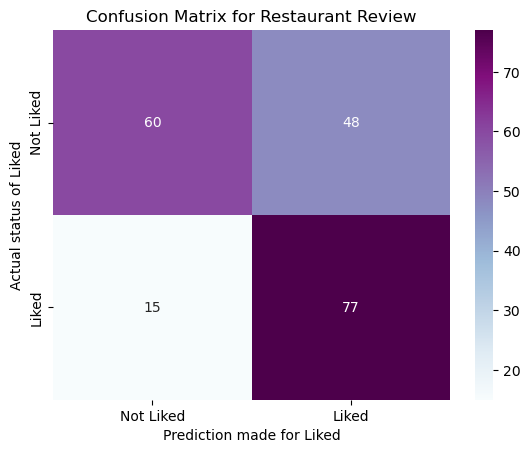

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ConfusionMatrix = confusion_matrix(Y_test_rest, y_pred_rest)
print(ConfusionMatrix)
ax = sns.heatmap(ConfusionMatrix,annot=True,cmap='BuPu')
ax.set_title('Confusion Matrix for Restaurant Review');
ax.set_xlabel('Prediction made for Liked')
ax.set_ylabel('Actual status of Liked');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Liked','Liked'])
ax.yaxis.set_ticklabels(['Not Liked','Liked'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [26]:
# Print a classification report
from sklearn import metrics
print(metrics.classification_report(Y_test_rest,y_pred_rest))

              precision    recall  f1-score   support

           0       0.80      0.56      0.66       108
           1       0.62      0.84      0.71        92

    accuracy                           0.69       200
   macro avg       0.71      0.70      0.68       200
weighted avg       0.72      0.69      0.68       200



In [27]:
accuracy_score(Y_test_rest,y_pred_rest) # 0.685, not good not bad

0.685